<a href="https://colab.research.google.com/github/NeilMankodi/Sem-6-Pracs/blob/main/AA_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amortized Analysis**

In [ ]:
n = int(input("Enter number of elements to be inserted: "))

current_table_size = 0
total_cost_table = []
table_size = []
current_size = 0

for i in range(1, n+1):
    if current_size == current_table_size:
        if current_size == 0:
            current_table_size = 1
        else:
            current_table_size *= 2
        
        current_size += 1
        total_cost_table.append(current_size)
        table_size.append(current_table_size)
    else:
        current_size += 1
        total_cost_table.append(1)
        table_size.append(current_table_size)

Enter number of elements to be inserted: 9


In [ ]:
def print_table(n, table_size, total_cost_table):
    print("Legend -->\nIN = Item Number\nTS = Table Size\nTC = Total Cost\nCO = Cost of Operation\nCD = Cost of Doubling\n")
    print("IN\tTS\tTC\tCO\tCD")
    for i in range(n):
        print(str(i+1) + "\t " + str(table_size[i]) + "\t " + str(total_cost_table[i]) + "\t 1\t " + str(total_cost_table[i] - 1))

In [ ]:
print_table(n, table_size, total_cost_table)

Legend -->
IN = Item Number
TS = Table Size
TC = Total Cost
CO = Cost of Operation
CD = Cost of Doubling

IN	TS	TC	CO	CD
1	 1	 1	 1	 0
2	 2	 2	 1	 1
3	 4	 3	 1	 2
4	 4	 1	 1	 0
5	 8	 5	 1	 4
6	 8	 1	 1	 0
7	 8	 1	 1	 0
8	 8	 1	 1	 0
9	 16	 9	 1	 8


Aggregate Method

---



In [ ]:
total_cost = sum(total_cost_table)
avg_cost = round((total_cost / n), 2)

print("By aggregate method the average cost of operation over " + str(n) + " elements is " + str(avg_cost))

By aggregate method the average cost of operation over 9 elements is 2.67


Accounting Method

---



In [ ]:
import math

avg_cost = round((total_cost / n), 2)
amortized_cost_accounting = math.floor(avg_cost)

found = 0

while found != 1:
    i = 0
    bank = [amortized_cost_accounting] * n
    print("Checking if amortized cost of " + str(amortized_cost_accounting) + " is appropriate...")
    for i in range(n):
        if i != 0:
            bank[i] += bank[i-1]
        
        bank[i] -= total_cost_table[i]

        if bank[i] < 0:
            break

        if bank[i] >= 0 and i == n-1:
            found = 1
    
    if found != 1:
        print("trial unsuccessful\n")
        amortized_cost_accounting += 1

print("trial successful")

Checking if amortized cost of 2 is appropriate...
trial unsuccessful

Checking if amortized cost of 3 is appropriate...
trial successful


In [ ]:
def print_table_accounting(n, table_size, total_cost_table, amortized_cost, bank):
    print("Legend -->\nIN = Item Number\nTS = Table Size\nTC = Total Cost\nCO = Cost of Operation\nCD = Cost of Doubling\nAC = Amortized Cost\nB = Bank\n")
    print("IN\tTS\tTC\tCO\tCD\tAC\tB")
    for i in range(n):
        print(str(i+1) + "\t " + str(table_size[i]) + "\t " + str(total_cost_table[i]) + "\t 1\t " + str(total_cost_table[i] - 1) + "\t " + str(amortized_cost) + "\t" + str(bank[i]))

    total_amortized_cost = amortized_cost * n
    total_actual_cost = sum(total_cost_table)

    print("\nTotal Amortized Cost (" + str(total_amortized_cost) + ") >= Total Actual Cost (" + str(total_actual_cost) + ")")
    print("Hence upper bound proved by accounting method")

In [ ]:
print_table_accounting(n, table_size, total_cost_table, amortized_cost_accounting, bank)

Legend -->
IN = Item Number
TS = Table Size
TC = Total Cost
CO = Cost of Operation
CD = Cost of Doubling
AC = Amortized Cost
B = Bank

IN	TS	TC	CO	CD	AC	B
1	 1	 1	 1	 0	 3	2
2	 2	 2	 1	 1	 3	3
3	 4	 3	 1	 2	 3	3
4	 4	 1	 1	 0	 3	5
5	 8	 5	 1	 4	 3	3
6	 8	 1	 1	 0	 3	5
7	 8	 1	 1	 0	 3	7
8	 8	 1	 1	 0	 3	9
9	 16	 9	 1	 8	 3	3

Total Amortized Cost (27) >= Total Actual Cost (24)
Hence upper bound proved by accounting method


Potential Method

---



In [ ]:
potential = [0] * (n+1)
amortized_cost_potential = [0] * (n+1)

for i in range(1, n+1):
    potential[i] = 2*i - table_size[i-1]
    amortized_cost_potential[i] = total_cost_table[i-1] + (potential[i] - potential[i-1])

In [ ]:
def print_table_potential(n, table_size, total_cost_table, potential, amortized_cost_potential):
    print("Legend -->\nIN = Item Number\nTS = Table Size\nTC = Total Cost\nCO = Cost of Operation\nCD = Cost of Doubling\nP = Potential\nAC = Amortized Cost\n")
    print("IN\tTS\tTC\tCO\tCD\tP\tAC")
    for i in range(n):
        print(str(i+1) + "\t " + str(table_size[i]) + "\t " + str(total_cost_table[i]) + "\t 1\t " + str(total_cost_table[i] - 1) + "\t" + str(potential[i+1]) + "\t " + str(amortized_cost_potential[i+1]))

    total_amortized_cost = sum(amortized_cost_potential)
    total_actual_cost = sum(total_cost_table)

    print("\nTotal Amortized Cost (" + str(total_amortized_cost) + ") >= Total Actual Cost (" + str(total_actual_cost) + ")")
    print("Hence upper bound proved by potenial method")

In [ ]:
print_table_potential(n, table_size, total_cost_table, potential, amortized_cost_potential)

Legend -->
IN = Item Number
TS = Table Size
TC = Total Cost
CO = Cost of Operation
CD = Cost of Doubling
P = Potential
AC = Amortized Cost

IN	TS	TC	CO	CD	P	AC
1	 1	 1	 1	 0	1	 2
2	 2	 2	 1	 1	2	 3
3	 4	 3	 1	 2	2	 3
4	 4	 1	 1	 0	4	 3
5	 8	 5	 1	 4	2	 3
6	 8	 1	 1	 0	4	 3
7	 8	 1	 1	 0	6	 3
8	 8	 1	 1	 0	8	 3
9	 16	 9	 1	 8	2	 3

Total Amortized Cost (26) >= Total Actual Cost (24)
Hence upper bound proved by potenial method


# **Hiring Problem**

In [ ]:
import random

n = int(input("Enter the number of candidates: "))
daily = int(input("Enter daily salary: "))
i_cost = int(input("Enter interview cost: "))

worst_seq = [i*10 for i in range(1, 16)]
random_seq = worst_seq[:]
random.shuffle(random_seq)

Enter the number of candidates: 15
Enter daily salary: 1000
Enter interview cost: 1000


In [ ]:
def gen_hiring_cost(arr, daily):
    hiring_cost = [0] * (len(arr) + 1)

    current_skill = arr[0]
    day_of_hire = 1

    for i in range(2, len(arr)+1):
        if arr[i-1] > current_skill:
            current_skill = arr[i-1]
            hiring_cost[i] = ((i - day_of_hire + 1) * daily)
            day_of_hire = i
    
    return hiring_cost

def print_results(hiring_cost, i_cost, n, seq):
    print("Legend -->\nC = Candidate\nS = Skill\nI = Interview Cost\nF = Firing Cost\n")
    print("C\tS\tI\tF")

    for i in range(n):
        print("C" + str(int(seq[i] / 10)) + "\t" + str(seq[i]) + "\t$" + str(i_cost) + "\t$" + str(hiring_cost[i+1]))

    print("\nTotal Cost: $" + str(sum(hiring_cost) + n*i_cost))

In [ ]:
hiring_cost_worst = gen_hiring_cost(worst_seq, daily)
hiring_cost_random = gen_hiring_cost(random_seq, daily)

In [ ]:
print_results(hiring_cost_worst, i_cost, n, worst_seq)

Legend -->
C = Candidate
S = Skill
I = Interview Cost
F = Firing Cost

C	S	I	F
C1	10	$1000	$0
C2	20	$1000	$2000
C3	30	$1000	$2000
C4	40	$1000	$2000
C5	50	$1000	$2000
C6	60	$1000	$2000
C7	70	$1000	$2000
C8	80	$1000	$2000
C9	90	$1000	$2000
C10	100	$1000	$2000
C11	110	$1000	$2000
C12	120	$1000	$2000
C13	130	$1000	$2000
C14	140	$1000	$2000
C15	150	$1000	$2000

Total Cost: $43000


In [ ]:
print_results(hiring_cost_random, i_cost, n, random_seq)

Legend -->
C = Candidate
S = Skill
I = Interview Cost
F = Firing Cost

C	S	I	F
C7	70	$1000	$0
C9	90	$1000	$2000
C5	50	$1000	$0
C4	40	$1000	$0
C6	60	$1000	$0
C3	30	$1000	$0
C13	130	$1000	$6000
C12	120	$1000	$0
C1	10	$1000	$0
C8	80	$1000	$0
C2	20	$1000	$0
C15	150	$1000	$6000
C14	140	$1000	$0
C11	110	$1000	$0
C10	100	$1000	$0

Total Cost: $29000


# **Randomized Quicksort**

In [ ]:
import random

def partition(arr, low, high):
    i = low - 1
    pivot = high

    for j in range(low, high):
        if arr[j] < arr[pivot]:
            i += 1
            swap = arr[j]
            arr[j] = arr[i]
            arr[i] = swap

    swap = arr[i+1]
    arr[i+1] = arr[pivot]
    arr[pivot] = swap

    return i+1

def quicksort(arr, low, high):
    if low < high:
        q = partition(arr, low, high)
        quicksort(arr, low, q-1)
        quicksort(arr, q+1, high)

def random_partition(arr, low, high):
    index = random.choice(range(low, high+1))
    swap = arr[index]
    arr[index] = arr[high]
    arr[high] = swap
    return partition(arr, low, high)

def random_quicksort(arr, low, high):
    if low < high:
        q = random_partition(arr, low, high)
        random_quicksort(arr, low, q-1)
        random_quicksort(arr, q+1, high)

In [ ]:
from datetime import datetime

worst_time = []
random_time = []

elements = [100, 150, 200, 250]

for element in elements:
    worst_seq = [i for i in range(element)]
    random_seq = worst_seq[:]
    random.shuffle(random_seq)

    now_worst = datetime.now()
    quicksort(worst_seq, 0, len(worst_seq) - 1)
    then_worst = datetime.now()
    time_worst = then_worst - now_worst
    worst_time.append(time_worst.microseconds)

    now_random = datetime.now()
    quicksort(random_seq, 0, len(random_seq) - 1)
    then_random = datetime.now()
    time_random = then_random - now_random
    random_time.append(time_random.microseconds)

In [ ]:
print("Legend -->\nE = Elements\nN = Normal Quick Sort\nR = Randomized Quick Sort\n")

print("E\t\tN\t\tR")
for i in range(len(elements)):
    print(str(elements[i]) + "\t\t" + str(worst_time[i]) + " μs\t\t" + str(random_time[i]) + " μs")

Legend -->
E = Elements
N = Normal Quick Sort
R = Randomized Quick Sort

E		N		R
100		1279 μs		170 μs
150		2774 μs		231 μs
200		4798 μs		358 μs
250		7633 μs		499 μs


# **Ford Fulkerson**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
G = nx.DiGraph()

G.add_edge("0", "1", weight=8)
G.add_edge("0", "3", weight=3)
G.add_edge("1", "2", weight=9)
G.add_edge("2", "5", weight=2)
G.add_edge("3", "2", weight=7)
G.add_edge("3", "4", weight=4)
G.add_edge("4", "5", weight=5)

In [ ]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, font_weight="bold")
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


Capacity for path ['0', '1', '2', '5'] is = 2


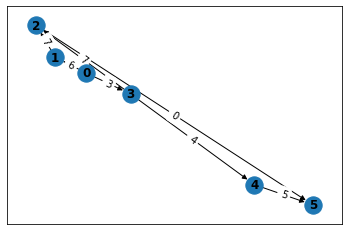


Capacity for path ['0', '3', '2', '5'] is = 0


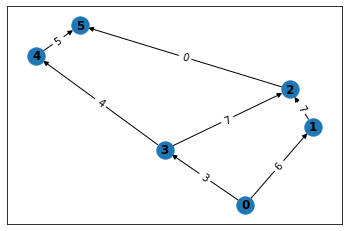


Capacity for path ['0', '3', '4', '5'] is = 3


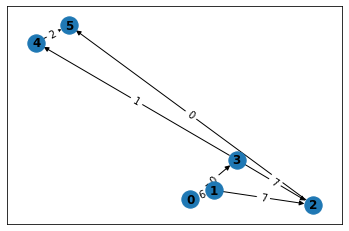


Max flow for given graph = 5


In [ ]:
max_flow = 0
paths = nx.all_simple_paths(G, source="0", target="5")

for path in paths:
    capacity = 1000
    
    x = 0
    y = 1
    while y != len(path):
        if G[path[x]][path[y]]["weight"] < capacity:
            capacity = G[path[x]][path[y]]["weight"]
        
        x += 1
        y += 1
    
    max_flow += capacity

    x = 0
    y = 1
    while y != len(path):
        G[path[x]][path[y]]["weight"] -= capacity

        x += 1
        y += 1

    print("\nCapacity for path " + str(path) + " is = " + str(capacity))
    draw_graph(G)

print("\nMax flow for given graph =", max_flow)

# **RB Tree Insertion**

In [ ]:
import sys

class Node():
    def __init__(self, item):
        self.item = item
        self.parent = None
        self.left = None
        self.right = None
        self.color = 1

class RedBlackTree():
    def __init__(self):
        self.TNULL = Node(0)
        self.TNULL.left = None
        self.TNULL.right = None
        self.TNULL.color = 0
        self.root = self.TNULL

    def insert(self, key):
        node = Node(key)
        node.item = key
        node.parent = None
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 1

        y = None
        x = self.root

        while x != self.TNULL:
            y = x
            if node.item < x.item:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.item < y.item:
            y.left = node
        else:
            y.right = node
        
        if node.parent == None:
            node.color = 0
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == 1:
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.right_rotate(k.parent.parent)
            
            if self.root == k:
                break

        self.root.color = 0

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x
        
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y

        x.parent = y
        y.left = x

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x
        
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y

        x.parent = y
        y.right = x

    def print_tree(self):
        self.__print_tree_helper(self.root, "", True)

    def __print_tree_helper(self, node, indent, last):
        if node != self.TNULL:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            
            s_color = "Red" if node.color == 1 else "Black"
            print(str(node.item) + "(" + s_color + ")")
            self.__print_tree_helper(node.left, indent, False)
            self.__print_tree_helper(node.right, indent, True)

In [ ]:
rbt = RedBlackTree()
elements = [8, 18, 5, 15, 17, 25, 40, 80]

for i in elements:
    rbt.insert(i)

rbt.print_tree()

R----17(Black)
     L----8(Red)
     |    L----5(Black)
     |    R----15(Black)
     R----25(Red)
          L----18(Black)
          R----40(Black)
               R----80(Red)
